<a href="https://colab.research.google.com/github/tmendonca28/pytorch-trial/blob/master/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*   Used for classification
*   A good example is for classification: Spam vs No Spam
  * Input: Bunch of words
  * Output: Probability whether they are spam or not
* Logistic Reg: the output is a probability [0,1] given input belonging to a class
* It will give a probability between 0 and 1 e.g. p=0.8 or p=0.3

# Example (Linear Regression First)
* Fever
* **Input** : Temperature
* **Output**: fever or no fever

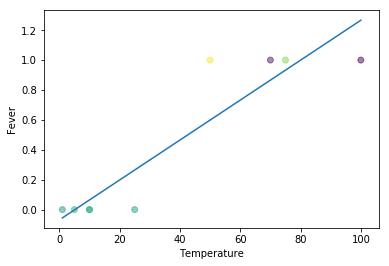

In [63]:
import numpy as np
import matplotlib.pyplot as plt

x = [1, 5, 10, 10, 25, 50, 70, 75, 100,]
y = [0, 0, 0, 0, 0, 1, 1, 1, 1]

colors = np.random.rand(len(x))
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.ylabel("Fever")
plt.xlabel("Temperature")

plt.scatter(x, y, c=colors, alpha=0.5)
plt.show()
# shows that linear regression is not made for classification problems

# **Logistic Regression in-depth**
* Linear regression -> logistic function -> probability
* y -> S = g(y) 
* we compare the softmax and true labels (L) with a Cross Entropy Function
* D(S, L)

# Building a Logistic Regression Model with PyTorch
* Input size: 784
* Output size: 10
* Linear Function -> Softmax -> CrossEntropy

In [0]:
# Loading the MNIST Train Dataset
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.autograd import Variable

In [0]:
train_dataset = dsets.MNIST(root='./data',
                           train=True,
                           transform=transforms.ToTensor(),
                           download=True)

In [66]:
len(train_dataset)

60000

In [67]:
train_dataset[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [68]:
type(train_dataset[0])

tuple

In [69]:
# Input matrix
train_dataset[0][0].size()

torch.Size([1, 28, 28])

In [70]:
# Label
train_dataset[0][1]

5

**Displaying MNIST**

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [72]:
train_dataset[0][0].numpy().shape

(1, 28, 28)

In [0]:
show_img = train_dataset[0][0].numpy().reshape(28, 28)

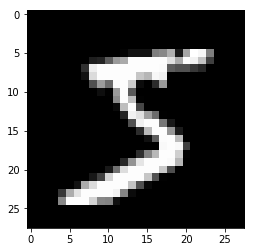

In [74]:
plt.imshow(show_img, cmap='gray')

**Loading MNIST Test Dataset**


*   Helps to show that the algorithm works beyond the data we have trained on
*   Out-of-sample



In [0]:
test_dataset = dsets.MNIST(root='./data',
                           train=False,
                           transform=transforms.ToTensor())

In [76]:
len(test_dataset)

10000

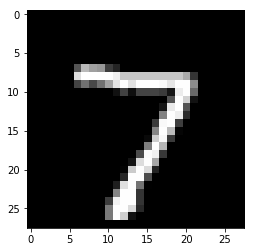

In [77]:
show_img = test_dataset[0][0].numpy().reshape(28, 28)
plt.imshow(show_img, cmap='gray')

In [78]:
# Label
test_dataset[0][1]

7

**Make Dataset Iterable**
* totaldata = 60000
* minibatch = 100
  * Number of examples in one iteration
* Iterations = 3000
  * where 1 iteration is one mini-batch forward & backward pass
* Epochs
  * 1 epoch: running through the whole dataset once
  * epochs = iterations / (totaldata/minibatch) = 3000 / (60000/100) = 5

In [79]:
len(train_dataset)

60000

In [0]:
batch_size = 100

In [0]:
n_iters = 3000

In [82]:
num_epochs = n_iters / (len(train_dataset)/ batch_size)
num_epochs = int(num_epochs)
num_epochs

5

**Create Iterable Object: Training Dataset**

In [0]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
# shuffle=True helps in preventing overfitting

**Checking Iterability**

In [84]:
import collections
isinstance(train_loader, collections.Iterable)

True

**Create Iterable Object: Testing Dataset**

In [0]:
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

**Building our Model**

In [0]:
class LogisticRegressionModel(nn.Module):
  def __init__(self, input_dim, output_dim):
    super(LogisticRegressionModel, self).__init__()
    self.linear = nn.Linear(input_dim, output_dim)
    
  def forward(self, x):
    out = self.linear(x)
    return out

**Instantiate Model class**

In [87]:
# Size of images
train_dataset[0][0].size()

torch.Size([1, 28, 28])

In [0]:
input_dim = 28*28
output_dim = 10
model = LogisticRegressionModel(input_dim, output_dim)

**Instantiate Loss class**

In [0]:
criterion = nn.CrossEntropyLoss()


**What does the nn.CrossEntropyLoss do?**
*   Computes softmax
*   Computes cross entropy



**Instantiate Optimizer Class**

In [0]:
learning_rate = 0.001

optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

**Params in-depth**

In [91]:
print(model.parameters())
print(len(list(model.parameters())))

# 1st Parameter
print(list(model.parameters())[0].size())

# 2nd Parameter
print(list(model.parameters())[1].size())

<generator object Module.parameters at 0x7f968f0f9c50>
2
torch.Size([10, 784])
torch.Size([10])


**Training the Model**

In [93]:
iter = 0
for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    # Load images as Variable
    images = Variable(images.view(-1, 28*28))
    labels = Variable(labels)
    
    # Clear gradients w.r.t params
    optimizer.zero_grad()
    
    # Forward pass to get output
    outputs = model(images)
    
    # Calculate loss
    loss = criterion(outputs, labels)
    
    # Get gradients w.r.t params
    loss.backward()
    
    # Update params
    optimizer.step()
    
    iter+=1
    
    if iter%500 == 0:
      # Calculate Accuracy (every 500 iterations)
      correct = 0
      total = 0
      
      # Iterate through the test dataset
      for images, labels in test_loader:
        # Load images into a torch Variable
        images = Variable(images.view(-1, 28*28))
        
        # Forward pass only to get output
        outputs = model(images)
        
        # Get predictions from the maximum value
        _, predicted = torch.max(outputs.data, 1)
        
        # Total nuber of labels
        total += labels.size(0)
        
        # Total correct predictions
        correct += (predicted == labels).sum()
        
      accuracy = 100 * correct/total
    
      # Print Loss
      print('Iteration:{}. Loss:{}. Accuracy: {}.'.format(iter, loss.item(), accuracy))

Iteration:500. Loss:1.5405076742172241. Accuracy: 76.
Iteration:1000. Loss:1.3651515245437622. Accuracy: 79.
Iteration:1500. Loss:1.2225667238235474. Accuracy: 81.
Iteration:2000. Loss:1.0226327180862427. Accuracy: 82.
Iteration:2500. Loss:1.152177095413208. Accuracy: 83.
Iteration:3000. Loss:0.8591456413269043. Accuracy: 83.


**Save Model**

In [0]:
save_model = False
if save_model is True:
  # Saves only parameters
  torch.save(model.state_dict(), 'awesome_model.pkl')